# Predicting the number of Covid fatalities in London neighborhoods 
# - data engineering

The idea of creating this notebook came to my mind when I observed an interesting map of "COVID-19 deaths rates for small areas of London (known as MSOAs)".
Developed by City Intelligence for **__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__** the map and the associated dataset is supposed to enable Londoners to observe how COVID-19 deaths in their area may relate to social and demographic structure of the local population. Deprivation and poverty, age and ethnic structure of the neighborhood, extent of pre-existing health conditions and occupational data were considered as possible predictors of number of Covid-19 fatalities. Previous studies had shown "**the mortality risk from COVID-19 is higher for people of older age groups, for men, for people with pre-existing health conditions, and for people from BAME backgrounds. London boroughs had some of the highest mortality rates from COVID-19"** according to the Office for National Statistics (ONS). 
The same source observed "mortality is associated with exposure to occupations classified ‘at risk’ and area deprivation. However, there are still many question marks about COVID-19-related mortality. 
The authors of the mentioned map observed the interaction between occupation and ethnicity needs to be further investigated as none of above mentioned factors, considered alone, is strogly enough associated with deaths for these small areas. **"In some cases it may relate to the age of the population, in others it may relate to the prevalence of underlying health conditions, area deprivation or the proportion of the population working in ‘at risk occupations’, and in some cases a combination of these or none of them"** (__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__, 2020).

The following Jupyter notebook reveals the necessary steps for importing the data and performing the initial data engineering steps (cleaning, renaming of features)

* The analysed dataset included the fatalities declared between 1 March 2020 until 17 April 2020 and reported by 20 April 2020.  

* This **Jupyter Notebook** represents an **example** of application of exploratory data analysis (EDA) and visual analysis. 

## Step 1: Activating the necessary package for Python to run the analysis
### Importing the dataset and renaming the features 

In [1]:
# Importing relevant packages

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pet
import matplotlib.colors as colors
%matplotlib inline
## setting the working directory from which csv dataset will be imported  
import os

#Change the Working Directory
## To avoid some repeated import errors I uploaded the dataset from my own laptop.  
os.chdir("C://@@ Default Folder Python Notebooks")

C:\Users\nastu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Importing the dataset with all neighborhoods / wards from London from local folder. 
dataset = pd.read_csv('Covid MSOA London.csv', encoding='ANSI')

### In case of interest you can download the dataset from this web link: 

**__[Access the Dataset here](https://github.com/sebastianBIanalytics/Data_Science_Machine_Learning_Python/blob/master/Data/Covid%20MSOA%20London.csv)__**

In [3]:
dataset.shape

(983, 20)

In [4]:
# Rename Variables 
dataset = dataset.rename(columns={'ï»¿MSOA11CD': 'MSOA_code',
                        'MSOA11NM': 'MSOA',
                        'Local authority':'BOROUGH',
                        'covid_19_deaths': 'Fatalities',
                        'covid_19_deaths_per_thousand': 'Fatalities per thousand',
                        'total_population_mid_2018': 'Population',
                        'over_70_prop': '70+ %',
                        'proportion_at_risk_jobs': 'Jobs at risk %',
                        'insecure_proportion': 'Insecure Jobs %',
                        'all_bame_prop': 'BAME %',
                        'all_black_prop': 'Black %',
                        'pakistani_or_bangladeshi_prop': 'Pakistani/Bangladeshi %',
                        'all_indian_prop': 'Indians %',
                        'child_poverty_prop': 'Child Poverty %',
                        'total_registered_patients': 'Patients'})        

In [5]:
dataset.head()

,MSOA_code,MSOA,BOROUGH,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
0,E02000001,City of London 001,City of London,3,0.344590,8706,0.123593,0.120794,0.077743,0.213695,0.026169,0.033627,0.029288,0.052592,8584,7.95,3.62,2.70,3.08,1.50
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,7720,0.103886,0.345813,0.318841,0.350111,0.167232,0.047970,0.039852,0.273855,8315,9.26,6.15,4.99,3.91,1.88
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,11051,0.085965,0.309099,0.260850,0.453858,0.161075,0.104629,0.080836,0.246672,11873,10.33,7.60,5.79,4.64,1.83
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,6586,0.124658,0.311407,0.265570,0.190230,0.104982,0.016338,0.007603,0.201967,6852,9.34,8.36,4.95,3.58,1.93
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,10229,0.066282,0.337135,0.322392,0.337304,0.168769,0.058748,0.035155,0.231935,11150,9.37,8.79,5.15,4.26,1.47


In [6]:
# Number of rows
print(dataset.shape[0])

983


In [7]:
# Column names
print(dataset.columns.tolist())

['MSOA_code', 'MSOA', 'BOROUGH', 'Fatalities', 'Fatalities per thousand', 'Population', '70+ %', 'Jobs at risk %', 'Insecure Jobs %', 'BAME %', 'Black %', 'Pakistani/Bangladeshi %', 'Indians %', 'Child Poverty %', 'Patients', 'Hypertension', 'Obesity (18+)', 'Diabetes', 'Asthma', 'Coronary heart disease']


In [14]:
## Identify if dataset contains missing values.  

df = dataset
dataset.isnull().sum().sort_values()

MSOA_code                  0
Diabetes                   0
Obesity (18+)              0
Hypertension               0
Patients                   0
Child Poverty %            0
Indians %                  0
Pakistani/Bangladeshi %    0
Black %                    0
BAME %                     0
Insecure Jobs %            0
Jobs at risk %             0
70+ %                      0
Population                 0
Fatalities per thousand    0
Fatalities                 0
BOROUGH                    0
MSOA                       0
Asthma                     0
Coronary heart disease     0
dtype: int64

In [8]:
# Data types
print(dataset.dtypes)

MSOA_code                   object
MSOA                        object
BOROUGH                     object
Fatalities                   int64
Fatalities per thousand    float64
Population                   int64
70+ %                      float64
Jobs at risk %             float64
Insecure Jobs %            float64
BAME %                     float64
Black %                    float64
Pakistani/Bangladeshi %    float64
Indians %                  float64
Child Poverty %            float64
Patients                     int64
Hypertension               float64
Obesity (18+)              float64
Diabetes                   float64
Asthma                     float64
Coronary heart disease     float64
dtype: object


In [9]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = dataset.describe()
stats_df = dataset.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
mean,5.035605,0.561541,9062.137335,0.086806,0.256513,0.221010,0.394199,0.130970,0.053250,0.063838,0.167226,10193.149542,10.028423,5.733927,4.741556,4.184557,1.802187
25%,3.000000,0.300897,7794.500000,0.060209,0.224707,0.160331,0.237144,0.049274,0.012135,0.017850,0.105967,8643.500000,8.500000,4.610000,3.845000,3.785000,1.390000
median,4.000000,0.490136,8753.000000,0.079564,0.262953,0.216112,0.373469,0.099700,0.024619,0.031192,0.172158,9845.000000,10.010000,5.600000,4.690000,4.180000,1.720000
75%,7.000000,0.735479,10013.500000,0.106673,0.294113,0.280964,0.536234,0.190551,0.052122,0.064754,0.225499,11336.000000,11.480000,6.740000,5.490000,4.600000,2.205000
range,28.000000,2.827037,19542.000000,0.205684,0.377321,0.342704,0.900521,0.537890,0.533507,0.489398,0.354765,18255.000000,11.880000,8.960000,9.040000,4.320000,2.710000


In [10]:
# The mean calculation
dataset.groupby('BOROUGH').mean()

,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
BOROUGH,,,,,,,,,,,,,,,,,
Barking and Dagenham,4.681818,0.501532,9636.272727,0.066743,0.327370,0.326762,0.415787,0.202328,0.082035,0.039189,0.262286,10722.727273,9.831364,8.121364,5.295909,3.991364,1.565909
Barnet,7.000000,0.735584,9564.390244,0.104650,0.256486,0.206510,0.357601,0.076664,0.021196,0.076919,0.127127,10383.292683,10.554146,5.017317,4.684878,3.986585,2.215854
Bexley,4.464286,0.523265,8830.642857,0.124081,0.281594,0.236285,0.179298,0.082873,0.006481,0.030658,0.147438,9053.928571,12.157143,7.407500,4.920000,4.268929,2.335714
Brent,8.941176,0.914662,9729.264706,0.085853,0.265766,0.275396,0.639314,0.185030,0.052533,0.189916,0.178225,11915.970588,10.687647,5.904412,6.122353,3.862941,1.817059
Bromley,3.897436,0.457759,8489.641026,0.131820,0.251344,0.180671,0.153534,0.058465,0.007414,0.019729,0.114216,9001.794872,12.474103,5.865128,4.268718,4.900256,2.575897
Camden,3.250000,0.336415,9365.214286,0.084884,0.208578,0.157176,0.337625,0.080826,0.063474,0.028310,0.151778,9784.642857,9.068214,3.941429,3.286786,3.679286,1.361786
City of London,3.000000,0.344590,8706.000000,0.123593,0.120794,0.077743,0.213695,0.026169,0.033627,0.029288,0.052592,8584.000000,7.950000,3.620000,2.700000,3.080000,1.500000
Croydon,5.727273,0.655495,8757.863636,0.099756,0.276184,0.227733,0.438982,0.196531,0.035906,0.066837,0.164807,9715.363636,11.149091,5.770455,4.928409,4.360000,1.984545
Ealing,6.128205,0.707447,8768.769231,0.089893,0.251468,0.242716,0.492139,0.104909,0.045792,0.134367,0.165111,10997.769231,11.008462,6.183590,5.653590,4.522308,2.158974


In [11]:
# The median calculation
dataset.groupby('BOROUGH').median()

,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
BOROUGH,,,,,,,,,,,,,,,,,
Barking and Dagenham,4.5,0.450539,9560.0,0.065611,0.329355,0.331284,0.364174,0.186777,0.052613,0.029139,0.254127,10591.0,10.050,8.045,5.070,4.050,1.510
Barnet,7.0,0.702036,9292.0,0.104454,0.257376,0.190203,0.354596,0.062443,0.018509,0.070282,0.118652,9908.0,10.730,4.930,4.640,4.120,2.260
Bexley,3.0,0.417898,8251.0,0.130698,0.277367,0.223732,0.131584,0.046751,0.006180,0.026837,0.136392,8536.5,12.185,7.145,4.895,4.305,2.450
Brent,7.5,0.788782,9492.0,0.079095,0.260742,0.272893,0.680235,0.139756,0.055174,0.169772,0.182119,11724.0,10.860,5.685,6.455,3.900,1.770
Bromley,4.0,0.452489,8262.0,0.129421,0.252985,0.173857,0.142427,0.039281,0.006247,0.018079,0.104143,8816.0,12.470,5.830,4.290,4.970,2.620
Camden,3.0,0.349820,9318.0,0.080316,0.200745,0.150169,0.336426,0.076825,0.048693,0.028108,0.161663,9631.5,9.385,3.860,3.090,3.820,1.430
City of London,3.0,0.344590,8706.0,0.123593,0.120794,0.077743,0.213695,0.026169,0.033627,0.029288,0.052592,8584.0,7.950,3.620,2.700,3.080,1.500
Croydon,5.0,0.594487,8499.0,0.090074,0.282135,0.230406,0.423380,0.200082,0.026742,0.048245,0.169138,9489.5,10.995,5.645,4.920,4.295,1.915
Ealing,5.0,0.618238,8441.0,0.089485,0.259119,0.256127,0.488477,0.092778,0.036337,0.074691,0.184820,10277.0,11.230,6.370,5.090,4.610,2.060


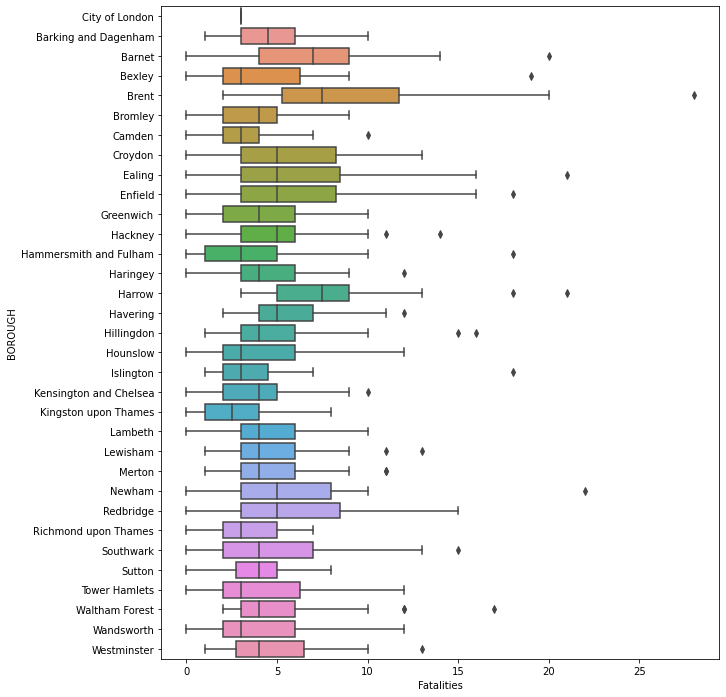

In [12]:
plt.figure(figsize=(10, 12))
sns.boxplot(x ='Fatalities', y='BOROUGH', data=dataset)
plt.show()

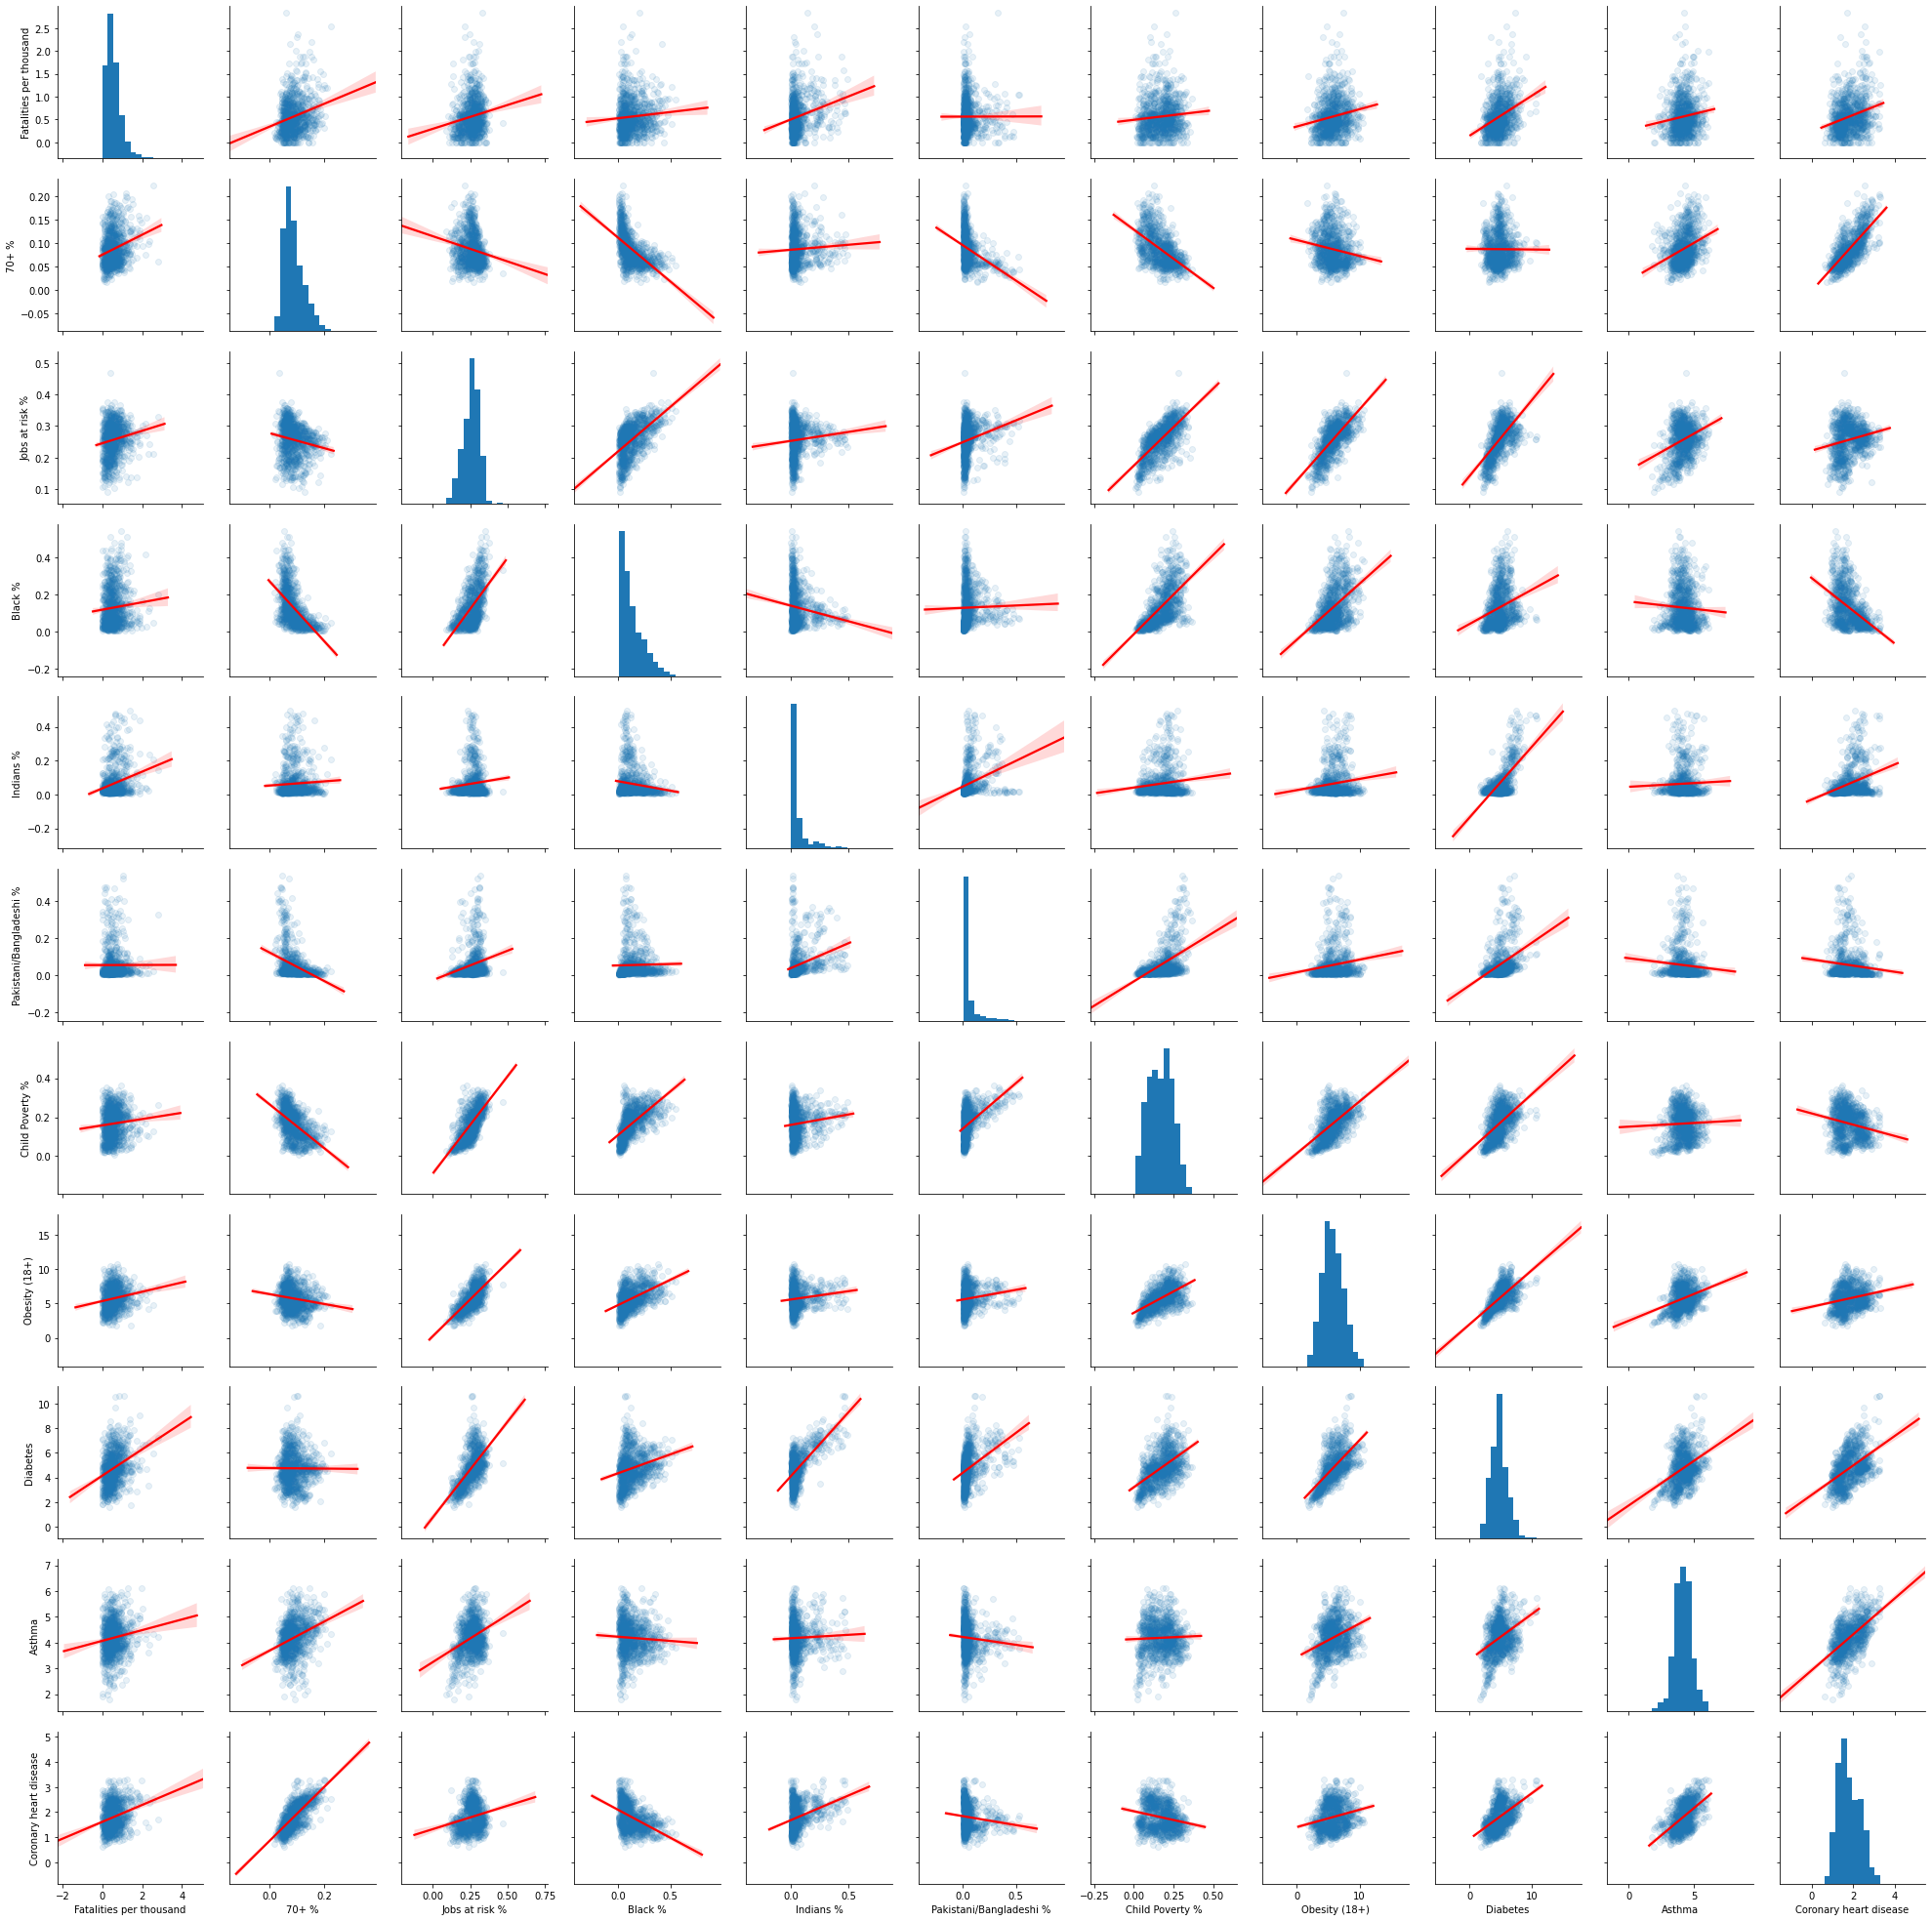

In [13]:
sns.pairplot(dataset[['Fatalities per thousand', '70+ %', 'Jobs at risk %', 'Black %', 'Indians %','Pakistani/Bangladeshi %', 
                 'Child Poverty %', 'Obesity (18+)', 'Diabetes', 'Asthma','Coronary heart disease']], 
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

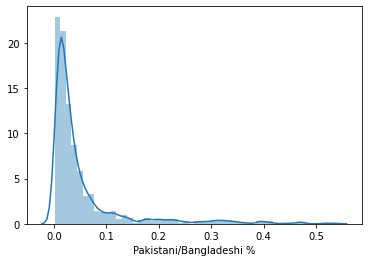

In [20]:
sns.distplot(dataset['Pakistani/Bangladeshi %'])

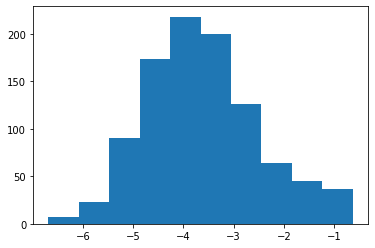

In [19]:
data = dataset['Pakistani/Bangladeshi %']
plt.hist(np.log(data));

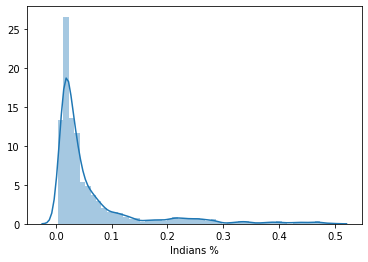

In [21]:
sns.distplot(dataset['Indians %'])

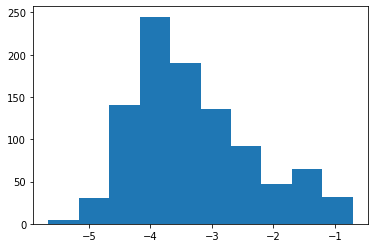

In [22]:
data = dataset['Indians %']
plt.hist(np.log(data));

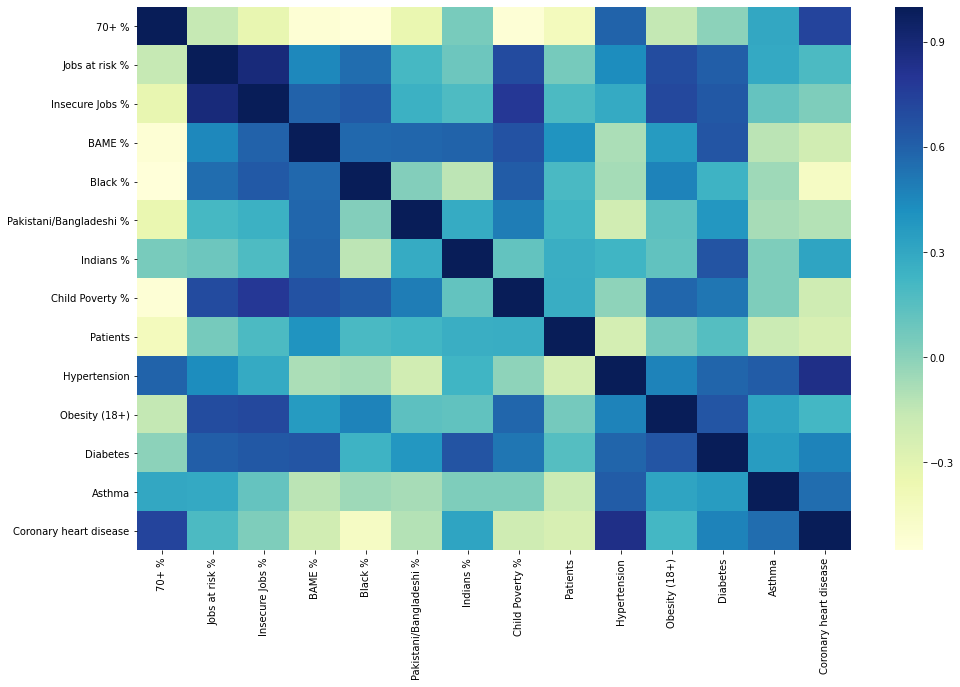

In [23]:
datacorel = dataset.drop(columns=[ 'MSOA_code', 'MSOA', 'BOROUGH', 'Fatalities', 
                                  'Fatalities per thousand', 'Population'])

plt.figure(figsize = (16,10))
sns.heatmap(datacorel.corr(),annot = False, cmap="YlGnBu")


## 3. Performing Multiple Regression Model 

Following the visualisation of association between different variables and the Covid-19 fatalities it can be concluded the following predictors can be included in the multiple regression model: 
* percent of **70+**, 
* percent of **Jobs at risk**, 
* percent of **Black** and 
* percent of **Indians**, 
* percent with **Hypertension**, 
* percent with **Diabetes**, and 
* percent with **Coronary heart disease** in the MSOA. 

In [24]:
# Putting feature variable to X
  
X = dataset[['70+ %', 'Jobs at risk %', 'Indians %', 'Black %','Hypertension', 'Diabetes', 'Coronary heart disease']]

# Putting response variable to y
y = dataset['Fatalities per thousand']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

**Fit `StandardScaler` on `X_train`**

In [31]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [34]:
X_train_s

array([[ 7.08968017e-01, -2.33539613e-02, -5.45379197e-01, ...,
         5.81266948e-01,  1.10988524e-03,  1.13628834e+00],
       [ 5.65343606e-01, -4.73364865e-01, -3.35523383e-01, ...,
        -1.95184210e-01, -6.89067986e-01,  4.79552817e-01],
       [-1.87311798e-01, -3.24912569e-02,  1.40243746e-01, ...,
        -3.13126158e-01, -5.76286569e-02, -6.60076476e-01],
       ...,
       [-4.41818671e-01,  9.04386305e-01,  1.56335446e-02, ...,
         3.35554556e-01,  3.90252727e-01,  3.63658313e-01],
       [-2.84174100e-01,  7.73893571e-01,  2.13232486e-01, ...,
         4.73153496e-01,  1.56502357e+00,  4.21605565e-01],
       [-6.39276942e-01, -2.60183464e-01, -5.87808369e-01, ...,
        -5.75852704e-02, -2.41186601e-01, -4.86234719e-01]])